In [1]:
import numpy as np
import torch
import torch.nn as nn
from torch.autograd import Variable
from tqdm import tqdm
from torchvision.transforms import Compose
from src.data.transforms import GrayScale, Padding, Resize, HistEqualisation, MinMaxNormalization, ToTensor

import mlflow

import matplotlib.pyplot as plt
%matplotlib inline

from src import *
from src.data import TrainValTestSplitter, MURASubset
from src.models import BaselineAutoencoder, BottleneckAutoencoder
splitter = TrainValTestSplitter(path_to_data=XR_HAND_CROPPED_PATH)

ModuleNotFoundError: No module named 'numpy.core._multiarray_umath'

In [ ]:
# Connection to MLflow server, be sure, you connected to set up ssh bridge
client = mlflow.tracking.MlflowClient(MLFLOW_TRACKING_URI)
client.list_experiments()

In [ ]:
exp = client.get_experiment('2')
exp.

In [3]:
params = {
    'batch_size': 64,
    'image_resolution': (512, 512),
    'pipeline': {
        'hist_equalisation': False,
        'cropped': True,
    }
}

composed_transforms = Compose([GrayScale(),
                               Padding(),
                               Resize(params['image_resolution']),
                               HistEqualisation(active=params['pipeline']['hist_equalisation']),
                               MinMaxNormalization(),
                               ToTensor()])

validation = MURASubset(filenames=splitter.data_val.path, true_labels=splitter.data_val.label,
                        patients=splitter.data_val.patient, transform=composed_transforms)

In [14]:
run_id = '0ca304cc755f4203a5c6576edb14e4b9'

In [15]:
experiment = client.get_experiment('1')
path = f'{experiment.artifact_location}/{run_id}/baseline_autoencoder/data/model.pth'
path

'/home/ubuntu/mlruns/1/0ca304cc755f4203a5c6576edb14e4b9/baseline_autoencoder/data/model.pth'

In [19]:
client.download_artifacts('0ca304cc755f4203a5c6576edb14e4b9', 
                          path=f'/home/ubuntu/mlruns/1/0ca304cc755f4203a5c6576edb14e4b9/artifacts/baseline_autoencoder/data/model.pth')

FileNotFoundError: [Errno 2] No such file or directory: '/home/ubuntu/mlruns/1/0ca304cc755f4203a5c6576edb14e4b9/artifacts/baseline_autoencoder/data/model.pth'

In [ ]:
model = Bottle

In [34]:
 
torch.load('../models/model_without_hist.pth', map_location='cpu')
model.eval().to('cpu')
outer_loss = nn.MSELoss(reduction='none')

C:\Users\valik\Anaconda3\lib\site-packages\torch\serialization.py:454: SourceChangeWarning: source code of class 'src.models.BaselineAutoencoder' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


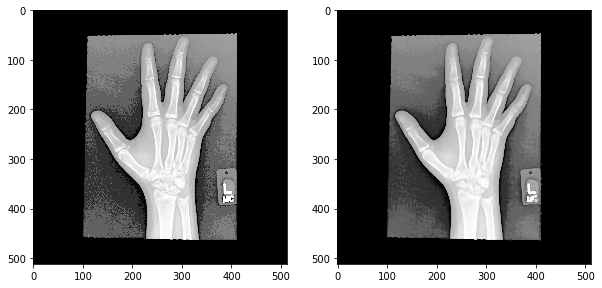

In [37]:
with torch.no_grad():
    inp_image = val_generator[-1][0:1]
    inp = torch.from_numpy(inp_image).float().to('cpu')
    output = model(inp)
    output_img = output.to('cpu').numpy()[0][0]

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    ax[0].imshow(inp_image[0][0], cmap='gray', vmin=0, vmax=1)
    ax[1].imshow(output_img, cmap='gray', vmin=0, vmax=1)
    plt.show()

C:\Users\valik\Anaconda3\lib\site-packages\torch\serialization.py:454: SourceChangeWarning: source code of class 'src.models.BaselineAutoencoder' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


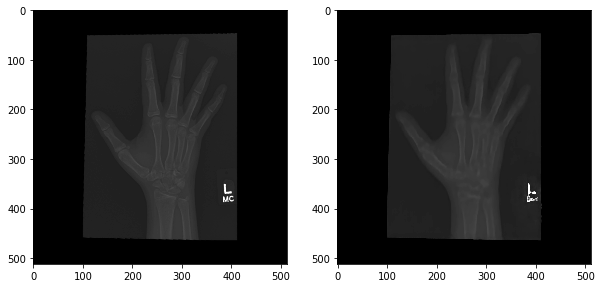

In [38]:
val_generator = DataGenerator(filenames=splitter.data_val.path, batch_size=32, dim=image_resolution,
                              true_labels=splitter.data_val.label, hist_equalisation=False)

model = torch.load('../models/baseline.pth', map_location='cpu')
model.eval().to('cpu')
outer_loss = nn.MSELoss(reduction='none')

with torch.no_grad():
    inp_image = val_generator[-1][0:1]
    inp = torch.from_numpy(inp_image).float().to('cpu')
    output = model(inp)
    output_img = output.to('cpu').numpy()[0][0]

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    ax[0].imshow(inp_image[0][0], cmap='gray', vmin=0, vmax=1)
    ax[1].imshow(output_img, cmap='gray', vmin=0, vmax=1)
    plt.show()

C:\Users\valik\Anaconda3\lib\site-packages\torch\serialization.py:454: SourceChangeWarning: source code of class 'src.models.BottleneckAutoencoder' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


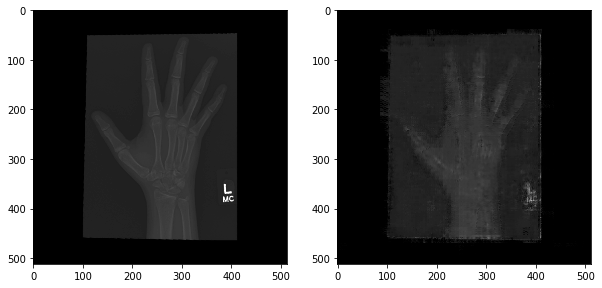

In [39]:
val_generator = DataGenerator(filenames=splitter.data_val.path, batch_size=32, dim=image_resolution,
                              true_labels=splitter.data_val.label, hist_equalisation=False)

model = torch.load('../models/bottleneck_small.pth', map_location='cpu')
model.eval().to('cpu')
outer_loss = nn.MSELoss(reduction='none')

with torch.no_grad():
    inp_image = val_generator[-1][0:1]
    inp = torch.from_numpy(inp_image).float().to('cpu')
    output = model(inp)
    output_img = output.to('cpu').numpy()[0][0]

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    ax[0].imshow(inp_image[0][0], cmap='gray', vmin=0, vmax=1)
    ax[1].imshow(output_img, cmap='gray', vmin=0, vmax=1)
    plt.show()

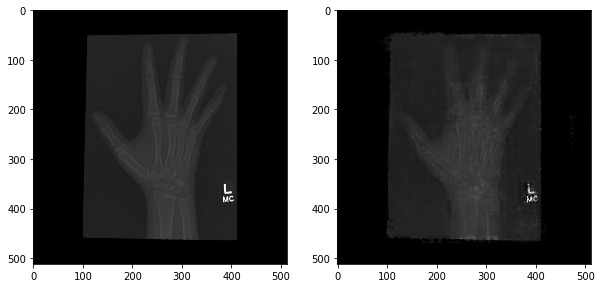

In [40]:
val_generator = DataGenerator(filenames=splitter.data_val.path, batch_size=32, dim=image_resolution,
                              true_labels=splitter.data_val.label, hist_equalisation=False)

model = torch.load('../models/bottleneck_big.pth', map_location='cpu')
model.eval().to('cpu')
outer_loss = nn.MSELoss(reduction='none')

with torch.no_grad():
    inp_image = val_generator[-1][0:1]
    inp = torch.from_numpy(inp_image).float().to('cpu')
    output = model(inp)
    output_img = output.to('cpu').numpy()[0][0]

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    ax[0].imshow(inp_image[0][0], cmap='gray', vmin=0, vmax=1)
    ax[1].imshow(output_img, cmap='gray', vmin=0, vmax=1)
    plt.show()